<a href="https://colab.research.google.com/github/sujitojha1/EVA4/blob/rev6/S13/EVA4_S13_Solution_AssignmentA_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement EVA 4, Session13 : Yolo Opencv

**Target**: 


* Assignment A:
  1. OpenCV Yolo: SOURCE (Links to an external site.)
  2. Run this above code on your laptop or Colab. 
  3. Take an image of yourself, holding another object which is there in COCO data set (search for COCO classes to learn). 
  4. Run this image through the code above. 
Upload the link to GitHub implementation of this
Upload the annotated image by YOLO. 

**Results**

*  

## 1. Import modules
We import the classes:

In [32]:
# Load weights and cfg
!wget -q https://github.com/sujitojha1/EVA4/releases/download/yolo/yolo_object_detection.zip
!unzip -q yolo_object_detection.zip
!mv ./yolo_object_detection/*.* ./
print("Loading weights and cfg")

import cv2
import numpy as np
import matplotlib.pyplot as plt

# For inline matplotlib plotting
%matplotlib inline

replace __MACOSX/._yolo_object_detection? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
Loading weights and cfg



## 2. Loading algorithm
We load the algorithm. The run the algorithm we need three files:

Weight file: it’s the trained model, the core of the algorithm to detect the objects.
Cfg file: it’s the configuration file, where there are all the settings of the algorithm.
Name files: contains the name of the objects that the algorithm can detect.

In [0]:
# Load Yolo
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
classes = []
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

In [0]:
# Loading image
img = cv2.imread("room_ser.jpg")
img = cv2.resize(img, None, fx=0.4, fy=0.4)
height, width, channels = img.shape

In [35]:
# Detecting objects
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)

net.setInput(blob)
outs = net.forward(output_layers)

# Showing informations on the screen
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
print(indexes)
font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[i]
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 5)
        cv2.putText(img, label, (x, y + 30), font, 3, color, 3)

[[1]
 [2]
 [3]
 [5]]


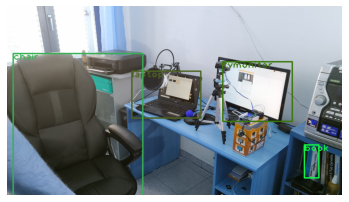

In [37]:
cv2.imwrite('room_ser_annotated.jpg',img)
plt.imshow(img)
plt.axis('off')
plt.show()